In [ ]:
!pip install seaborn scikit-learn torch torchvision matplotlib tensorflow einops tensorflow-addons seaborn scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     --------------------------- ------------ 41.0/60.4 kB 1.9 MB/s eta 0:00:01
     ---------------------------------------- 60.4/60.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -------- ------------------------------- 61.4/294.9 kB 1.7 MB/s eta 0:00:01
   ---------------- ----------------------- 122.9/294.9 kB 1.4 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.9 kB 1.8 MB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.9 kB 1.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB ? eta -:--:--
    ---------

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2672 - accuracy: 0.9213 - val_loss: 0.1419 - val_accuracy: 0.9588
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1025 - accuracy: 0.9687 - val_loss: 0.0912 - val_accuracy: 0.9705
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0688 - accuracy: 0.9788 - val_loss: 0.0781 - val_accuracy: 0.9768
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0506 - accuracy: 0.9844 - val_loss: 0.0837 - val_accuracy: 0.9742
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0382 - accuracy: 0.9878 - val_loss: 0.0657 - val_accuracy: 0.9798


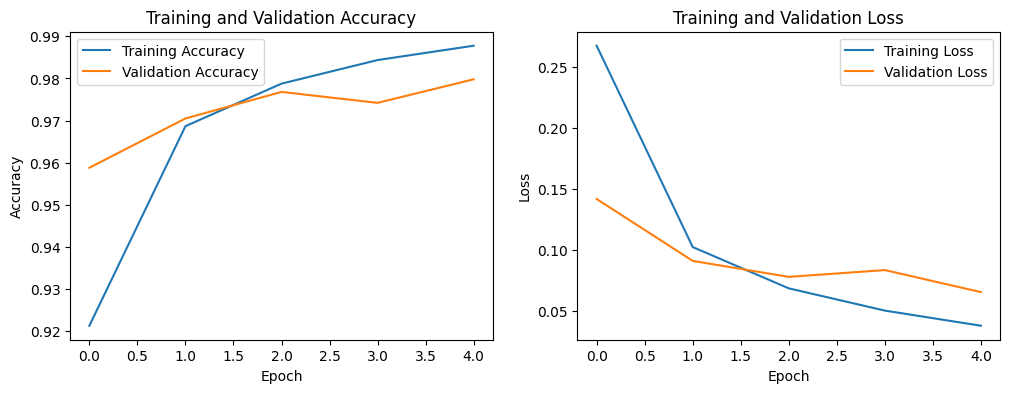

313/313 [==============================] - 1s 4ms/step - loss: 0.0657 - accuracy: 0.9798
Test accuracy: 0.9797999858856201
313/313 [==============================] - 1s 3ms/step


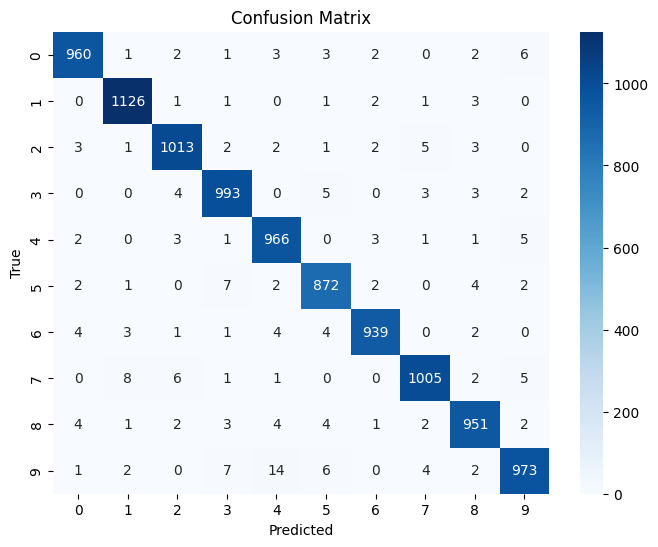

1/1 [==============================] - 0s 41ms/step


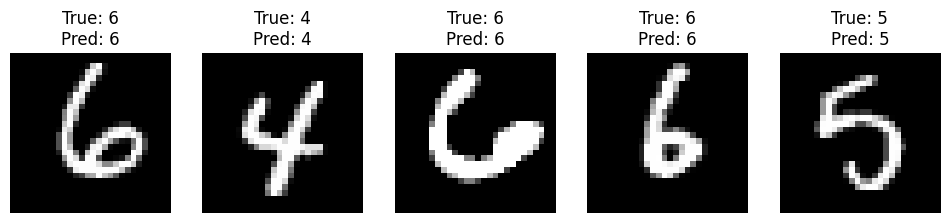

In [ ]:
class Simple_MLP_Handwriting_Classifier:
    # this function initailize the basic variables and loadint of the MNIST handwritten digits dataset
    def __init__(self):
        # this line will get the data for the training and testing of the MNIST dataset
        (self.mlp_train_digits_data, self.mlp_train_digits_labels), (self.mlp_test_digits_data, self.mlp_test_digits_labels) = mnist.load_data()

        # changing the shape of the data to make it faster
        self.mlp_train_digits_data = self.mlp_train_digits_data.reshape((60000, 28 * 28)).astype('float32') / 255
        self.mlp_test_digits_data = self.mlp_test_digits_data.reshape((10000, 28 * 28)).astype('float32') / 255
        self.mlp_train_digits_labels = to_categorical(self.mlp_train_digits_labels)
        self.mlp_test_digits_labels = to_categorical(self.mlp_test_digits_labels)
        self.simple_mlp_model = self.Simple_MLP_build_model()

    def Simple_MLP_build_model(self):
        simple_mlp_model = Sequential()
        simple_mlp_model.add(Dense(256, activation='relu', input_shape=(28 * 28,)))
        simple_mlp_model.add(Dense(128, activation='relu'))
        simple_mlp_model.add(Dense(10, activation='softmax'))
        simple_mlp_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
        return simple_mlp_model

    def MLP_train_simple_model(self, epochs=5, batch_size=128):
        previous_data = self.simple_mlp_model.fit(self.mlp_train_digits_data, self.mlp_train_digits_labels,
                                 epochs=epochs, batch_size=batch_size,
                                 validation_data=(self.mlp_test_digits_data, self.mlp_test_digits_labels))
        return previous_data

    def MLP_training_history(self, previous_data):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(previous_data.history['accuracy'], label='Training Accuracy')
        plt.plot(previous_data.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(previous_data.history['loss'], label='Training Loss')
        plt.plot(previous_data.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()

        plt.show()

    def evaluate_simple_mlp_model(self):
        # Evaluate the simple_mlp_model on the test data
        simple_mlp_test_loss, simple_mlp_test_acc = self.simple_mlp_model.evaluate(self.mlp_test_digits_data, self.mlp_test_digits_labels)
        print('Test accuracy:', simple_mlp_test_acc)
        return simple_mlp_test_acc

    def visualize_simple_mlp_predictions(self):
        simple_mlp_prediction = self.simple_mlp_model.predict(self.mlp_test_digits_data)
        simple_mlp_prediction_labels = np.argmax(simple_mlp_prediction, axis=1)
        mnist_true_labels = np.argmax(self.mlp_test_digits_labels, axis=1)

        s_mlp_cm = confusion_matrix(mnist_true_labels, simple_mlp_prediction_labels)
        plt.figure(figsize=(8, 6))
        sns.heatmap(s_mlp_cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()
        return mnist_true_labels, simple_mlp_prediction_labels

    def visualize_random_samples_numbers(self, num_samples=5):
        indices = random.sample(range(len(self.mlp_test_digits_data)), num_samples)
        sample_images = self.mlp_test_digits_data[indices]
        mnist_true_labels = np.argmax(self.mlp_test_digits_labels[indices], axis=1)
        simple_mlp_prediction = self.simple_mlp_model.predict(sample_images)
        simple_mlp_prediction_labels = np.argmax(simple_mlp_prediction, axis=1)
        plt.figure(figsize=(12, 3))
        for i in range(num_samples):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
            plt.title(f'True: {mnist_true_labels[i]}\nPred: {simple_mlp_prediction_labels[i]}')
            plt.axis('off')

        plt.show()

simple_mlp_mnist_digit_classifier = Simple_MLP_Handwriting_Classifier()

training_history = simple_mlp_mnist_digit_classifier.MLP_train_simple_model()

simple_mlp_mnist_digit_classifier.MLP_training_history(training_history)

mlp_simple_accuracy = simple_mlp_mnist_digit_classifier.evaluate_simple_mlp_model()

mlp_labels, mlp_predictions = simple_mlp_mnist_digit_classifier.visualize_simple_mlp_predictions()

simple_mlp_mnist_digit_classifier.visualize_random_samples_numbers()

Epoch [1/3], Training Loss: 0.2698, Training Accuracy: 91.36%, Validation Loss: 0.2778, Validation Accuracy: 91.62%
Epoch [2/3], Training Loss: 0.2313, Training Accuracy: 93.12%, Validation Loss: 0.2481, Validation Accuracy: 92.93%
Epoch [3/3], Training Loss: 0.1491, Training Accuracy: 95.41%, Validation Loss: 0.1685, Validation Accuracy: 94.99%


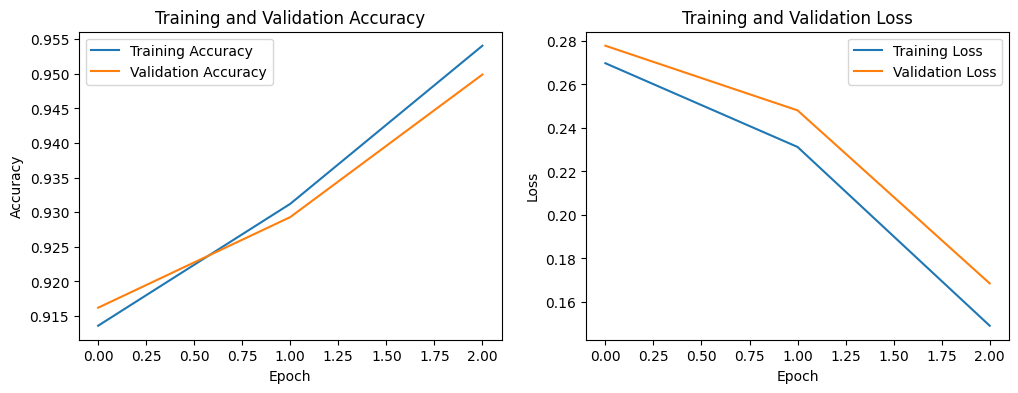

In [ ]:
class res_mlp_block(nn.Module):
    def __init__(self, in_features, out_features, hidden_features=None):
        super(res_mlp_block, self).__init__()
        hidden_features = hidden_features or out_features
        self.fc1 = nn.Linear(in_features, hidden_features)
        self.activation = nn.GELU()
        self.fc2 = nn.Linear(hidden_features, out_features)

    def forward(self, x):
        identity = x
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x + identity

class ResMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_blocks):
        super(ResMLP, self).__init__()
        self.fc_in = nn.Linear(input_size, hidden_size)
        self.blocks = nn.Sequential(*[res_mlp_block(hidden_size, hidden_size) for _ in range(num_blocks)])
        self.fc_out = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc_in(x)
        x = self.blocks(x)
        x = self.fc_out(x)
        return x

class MNIST_handwrittern_image_classifier:
    def __init__(self, input_size, hidden_size, output_size, num_blocks):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = ResMLP(input_size, hidden_size, output_size, num_blocks).to(self.device)
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])
        self.res_mlp_train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=self.transform, download= True)
        self.res_mlp_test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=self.transform, download= True)
        self.res_mlp_train_loader = torch.utils.data.DataLoader(dataset=self.res_mlp_train_dataset, batch_size=64)
        self.res_mlp_test_loader = torch.utils.data.DataLoader(dataset=self.res_mlp_test_dataset, batch_size=64)
        self.res_mlp_criterion = nn.CrossEntropyLoss()
        self.res_mlp_optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        self.num_epochs = 3

    def res_mlp_train_model(self):
        res_mlp_train_loss_ = []
        res_mlp_train_acc_history = []
        res_mlp_train_loss_history = []
        res_mlp_val_acc_history = []
        res_mlp_avg_train_acc_history=[]
        res_mlp_val_loss_history=[]
        mnist_all_Labels=[]
        for epoch in range(self.num_epochs):
            self.model.train()
            for digit_data, data_label in self.res_mlp_train_loader:
                digit_data, data_label = digit_data.view(-1, input_size).to(self.device), data_label.to(self.device)

                self.res_mlp_optimizer.zero_grad()
                res_mlp_output_data = self.model(digit_data)
                loss = self.res_mlp_criterion(res_mlp_output_data, data_label)
                loss.backward()
                self.res_mlp_optimizer.step()

            # Evaluate on training set
            self.model.eval()
            res_mlp_total_train, res_mlp_correct_train = 0, 0
            res_mlp_avg_train_loss = 0.0

            with torch.no_grad():
                for digit_data, data_label in self.res_mlp_train_loader:
                    digit_data, data_label = digit_data.view(-1, input_size).to(self.device), data_label.to(self.device)
                    res_mlp_output_data = self.model(digit_data)
                    _, res_mlp_prediction = torch.max(res_mlp_output_data, 1)
                    res_mlp_total_train += data_label.size(0)
                    res_mlp_correct_train += (res_mlp_prediction == data_label).sum().item()
                    res_mlp_avg_train_loss += self.res_mlp_criterion(res_mlp_output_data, data_label).item()

                res_mlp_train_accuracy = res_mlp_correct_train / res_mlp_total_train
                res_mlp_avg_train_loss = res_mlp_avg_train_loss / len(self.res_mlp_train_loader)
                res_mlp_train_loss_history.append(res_mlp_avg_train_loss)
                res_mlp_avg_train_acc_history.append(res_mlp_train_accuracy)

            # Evaluate on validation set
            self.model.eval()
            res_total_val, res_correct_val = 0, 0
            res_val_loss = 0.0

            with torch.no_grad():
                for digit_data, data_label in self.res_mlp_test_loader:
                    digit_data, data_label = digit_data.view(-1, input_size).to(self.device), data_label.to(self.device)
                    res_mlp_output_data = self.model(digit_data)
                    _, res_mlp_prediction = torch.max(res_mlp_output_data, 1)
                    res_total_val += data_label.size(0)
                    res_correct_val += (res_mlp_prediction == data_label).sum().item()
                    res_val_loss += self.res_mlp_criterion(res_mlp_output_data, data_label).item()

            res_mlp_val_accuracy = res_correct_val / res_total_val
            res_mlp_avg_val_loss = res_val_loss / len(self.res_mlp_test_loader)
            res_mlp_val_loss_history.append(res_mlp_avg_val_loss)
            res_mlp_val_acc_history.append(res_mlp_val_accuracy)

            print(f'Epoch [{epoch+1}/{self.num_epochs}], '
                  f'Training Loss: {res_mlp_avg_train_loss:.4f}, Training Accuracy: {100 * res_mlp_train_accuracy:.2f}%, '
                  f'Validation Loss: {res_mlp_avg_val_loss:.4f}, Validation Accuracy: {100 * res_mlp_val_accuracy:.2f}%')

        # Plot training history
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(res_mlp_avg_train_acc_history, label='Training Accuracy')
        plt.plot(res_mlp_val_acc_history, label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(res_mlp_train_loss_history, label='Training Loss')
        plt.plot(res_mlp_val_loss_history, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()

        plt.show()

    def res_mlp_evaluate_model(self):
        # Confusion matrix
        self.model.eval()
        mnist_all_Labels=[]
        mnist_all_predictions=[]
        with torch.no_grad():
            for digit_data, data_label in self.res_mlp_test_loader:
                digit_data, data_label = digit_data.view(-1, input_size).to(self.device), data_label.to(self.device)
                res_mlp_output_data = self.model(digit_data)
                _, res_mlp_prediction = torch.max(res_mlp_output_data, 1)
                mnist_all_Labels.extend(data_label.cpu().numpy())
                mnist_all_predictions.extend(res_mlp_prediction.cpu().numpy())

        res_mlp_cm = confusion_matrix(mnist_all_Labels, mnist_all_predictions)
        plt.figure(figsize=(8, 6))
        sns.heatmap(res_mlp_cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
        plt.xlabel('res_mlp_prediction')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

        random_indices = random.sample(range(len(self.res_mlp_test_dataset)), 5)
        random_images = torch.stack([self.res_mlp_test_dataset[i][0] for i in random_indices])
        random_labels = [self.res_mlp_test_dataset[i][1] for i in random_indices]

        self.model.eval()
        with torch.no_grad():
            random_images = random_images.view(-1, input_size).to(self.device)
            random_outputs = self.model(random_images)
            _, random_predictions = torch.max(random_outputs, 1)

        plt.figure(figsize=(12, 3))
        for i in range(5):
            plt.subplot(1, 5, i + 1)
            plt.imshow(random_images[i].cpu().view(28, 28), cmap='gray')
            plt.title(f'True: {random_labels[i]}\nPred: {random_predictions[i].item()}')
            plt.axis('off')

        plt.show()
        return mnist_all_Labels, mnist_all_predictions

input_size = 28 * 28
hidden_size = 256
output_size = 10
num_blocks = 6

mnist_classifier = MNIST_handwrittern_image_classifier(input_size, hidden_size, output_size, num_blocks)

mnist_classifier.res_mlp_train_model()


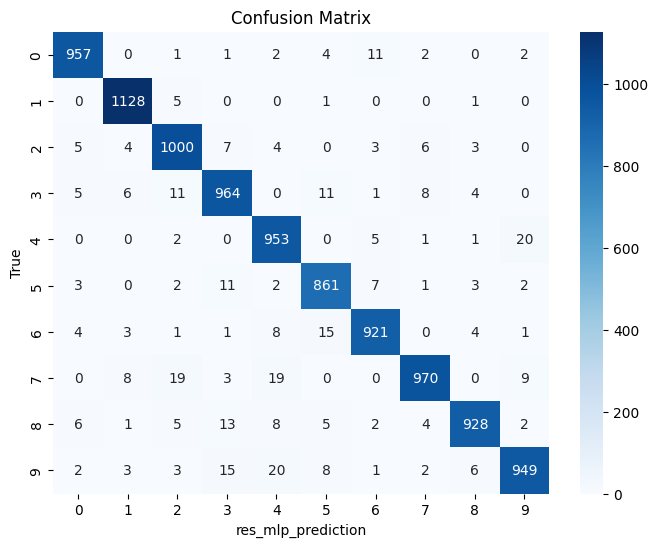

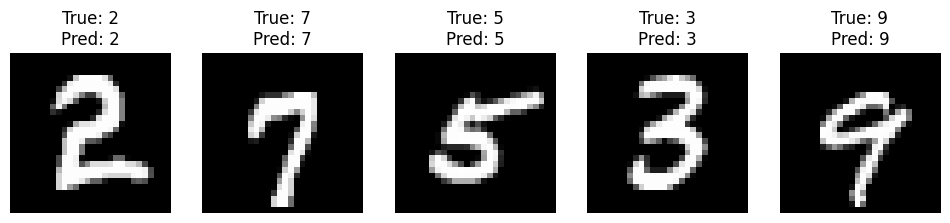

In [ ]:
resmlp_labels, resmlp_predictions = mnist_classifier.res_mlp_evaluate_model()

Precision:
MLP: 0.9798, ResMLP: 0.9633
Recall:
MLP: 0.9798, ResMLP: 0.9631
F1 Score:
MLP: 0.9798, ResMLP: 0.9631


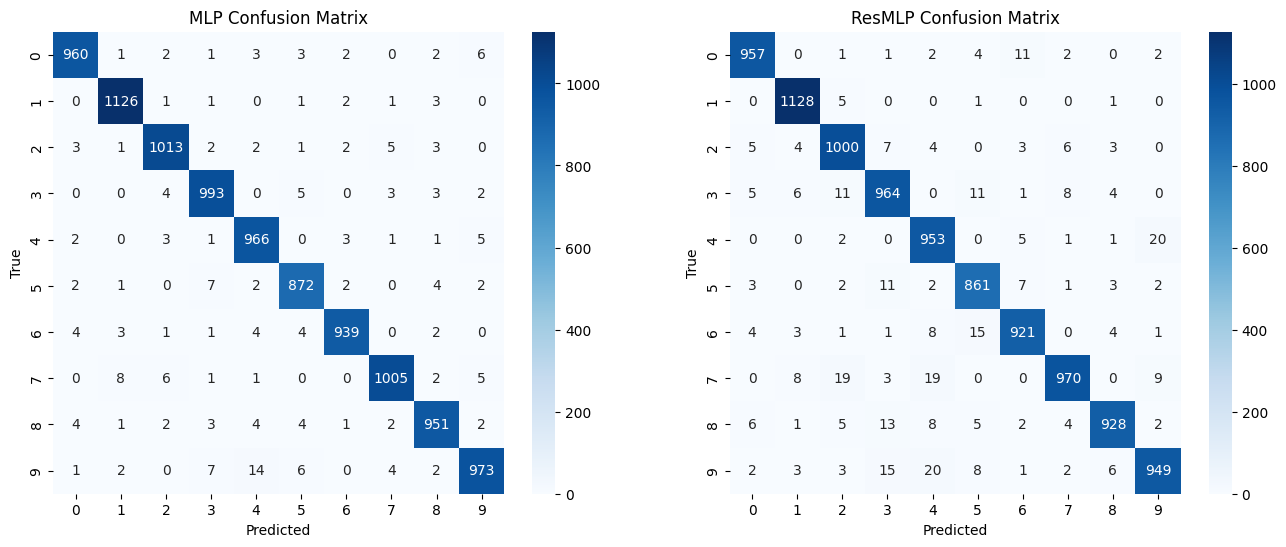

In [ ]:
mlp_precision = precision_score(mlp_labels, mlp_predictions, average='weighted')
resmlp_precision = precision_score(resmlp_labels, resmlp_predictions, average='weighted')

mlp_recall = recall_score(mlp_labels, mlp_predictions, average='weighted')
resmlp_recall = recall_score(resmlp_labels, resmlp_predictions, average='weighted')

mlp_f1 = f1_score(mlp_labels, mlp_predictions, average='weighted')
resmlp_f1 = f1_score(resmlp_labels, resmlp_predictions, average='weighted')

print("Precision:")
print(f"MLP: {mlp_precision:.4f}, ResMLP: {resmlp_precision:.4f}")

print("Recall:")
print(f"MLP: {mlp_recall:.4f}, ResMLP: {resmlp_recall:.4f}")

print("F1 Score:")
print(f"MLP: {mlp_f1:.4f}, ResMLP: {resmlp_f1:.4f}")

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(mlp_labels, mlp_predictions), annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('MLP Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(resmlp_labels, resmlp_predictions), annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('ResMLP Confusion Matrix')

plt.show()